In [5]:
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'p(x)')

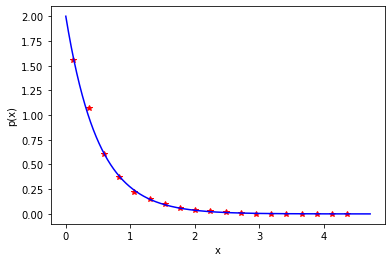

In [6]:
# Exercício 2

n_pnts = int(1e4)

u = np.random.rand(n_pnts)

lambda_var = 2

x = - (1 / lambda_var) * np.log(1 - u)
x_max = np.max(x)

n_bins = 20
dx = (x_max - 0) / n_bins

values, bins = np.histogram(x, bins=np.linspace(dx/2, x_max - dx/2, n_bins))
values = (values / np.sum(values)) / dx

dx = 0.001
x_values = np.arange(0, x_max, dx)

plt.plot(bins[0:-1], values, '*r')
plt.plot(x_values, lambda_var * np.exp(- lambda_var * x_values), '-b')
plt.xlabel("x")
plt.ylabel("p(x)")



Text(0, 0.5, 'pk(x)')

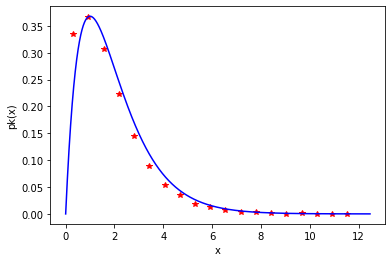

In [7]:
# a)

# Número de distribuições a somar
k = 2
lambda_var = 1

u = np.random.rand(n_pnts, k)
xk = - (1 / lambda_var) * np.log(1 - u)
xs = np.sum(xk, axis=1)

x_max = np.max(xs)
n_bins = 20
dx = (x_max - 0) / n_bins

values, bins = np.histogram(xs, bins=np.linspace(dx/2, x_max - dx/2, n_bins))
values = (values / np.sum(values)) / dx

dx = 0.001
x_values = np.arange(0, x_max, dx)

plt.plot(bins[0:-1], values, '*r')
plt.plot(x_values, lambda_var**k * x_values**(k - 1) * np.exp(- lambda_var * x_values) / gamma(k), '-b')
plt.xlabel("x")
plt.ylabel("pk(x)")


In [21]:
def pk(x, k, lambda_var):
    return lambda_var**k * x**(k - 1) * np.exp(- lambda_var * x) / gamma(k)
    

Fração rejeitada -> 0.8659


Text(0, 0.5, 'pk(x)')

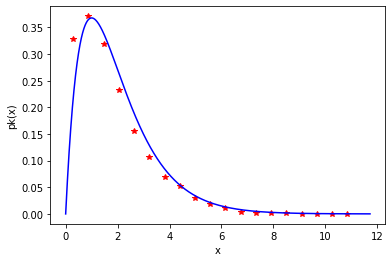

In [37]:
# b)

k = 2
lambda_var = 1

n_pnts = int(1e4)

x_max = 20
dx = 0.001
x_values = np.arange(0, x_max, dx)
a = np.max(pk(x_values, k, lambda_var))

x_accepted = list()
nn = 0
nt = 0

xp = list()
yp = list()

while nn < n_pnts:
    xp = np.random.rand(1) * x_max
    yp = a * np.random.rand(1)
    
    nt += 1
    
    if yp <= pk(xp, k, lambda_var):
        x_accepted.append(xp)
        nn += 1

print("Fração rejeitada -> {:.4f}".format((nt - n_pnts) / nt))

x_max = np.max(x_accepted)
n_bins = 20
dx = (x_max - 0) / n_bins

values, bins = np.histogram(x_accepted, bins=np.linspace(dx/2, x_max - dx/2, n_bins))
values = (values / np.sum(values)) / dx

dx = 0.001
x_values = np.arange(0, x_max, dx)

plt.plot(bins[0:-1], values, '*r')
plt.plot(x_values, lambda_var**k * x_values**(k - 1) * np.exp(- lambda_var * x_values) / gamma(k), '-b')
plt.xlabel("x")
plt.ylabel("pk(x)")


10
Fração rejeitada -> 0.7753


Text(0, 0.5, 'pk(x)')

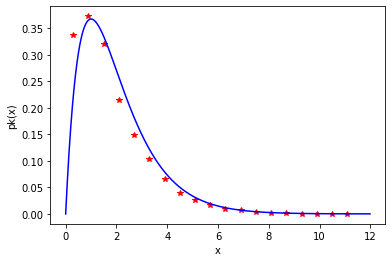

In [46]:
# c)

k = 2
lambda_var = 1

n_pnts = int(1e4)

x_max = 12
dx = 0.001
x_values = np.arange(0, x_max, dx)
a = np.max(pk(x_values, k, lambda_var))

n_rect = 10
dx_rect = (x_max - 0) / n_rect
xi = np.arange(0, 10, 1) * dx_rect # Limite inf de cada rectangulo
xs = xi + dx_rect # Limite sup de cada rectangulo
hr = np.zeros(n_rect)

for i in range(n_rect):
    x = np.arange(xi[i], xs[i], dx)
    hr[i] = np.max(pk(x, k, lambda_var))

x_accepted = list()
nn = 0
nt = 0

xp = list()
yp = list()

while nn < n_pnts:
    xp = np.random.rand(1) * x_max
    yp = a * np.random.rand(1)
    
    nt += 1
    
    if yp <= pk(xp, k, lambda_var):
        x_accepted.append(xp)
        nn += 1

print("Fração rejeitada -> {:.4f}".format((nt - n_pnts) / nt))

x_max = np.max(x_accepted)
n_bins = 20
dx = (x_max - 0) / n_bins

values, bins = np.histogram(x_accepted, bins=np.linspace(dx/2, x_max - dx/2, n_bins))
values = (values / np.sum(values)) / dx

dx = 0.001
x_values = np.arange(0, x_max, dx)

plt.plot(bins[0:-1], values, '*r')
plt.plot(x_values, lambda_var**k * x_values**(k - 1) * np.exp(- lambda_var * x_values) / gamma(k), '-b')
plt.xlabel("x")
plt.ylabel("pk(x)")
